# LightGBM

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [91]:
df = pd.read_csv("./data/cleansed.csv" ,encoding = "utf-8")
df = df.drop("Unnamed: 0", axis = 1)
#表示列の増加
pd.set_option('display.max_columns', 162)
df.head()

,Median_Age,Mean_Age,Male,Any_Comorbidity,Fever_temperature_373C,Cough,Chronic_obstructive_lung_COPD,Diabetes,Hypertension,Cardiovascular_Disease_incl_CAD,Fatigue,Other,Shortness_of_Breath_dyspnoea,Smoking_history,BMI,Cancer_Any,Asian,Cerebrovascular_Disease,Diarrhoea,Mortality
0,56.0,50.680772,62.30,47.60,94.00,79.00,3.00,19.00,30.00,8.00,23.03,12.00,0.0,5.76,0.0,1.68,100.0,0.0,4.71,0.28
1,69.0,50.680772,70.37,66.67,94.44,72.22,7.41,31.48,48.15,24.07,27.78,20.37,0.0,9.26,0.0,0.00,100.0,0.0,3.70,1.00
2,52.0,50.680772,59.12,40.15,94.16,81.75,1.46,13.87,23.36,1.46,21.17,8.03,0.0,4.38,0.0,7.00,100.0,0.0,5.11,0.00
3,58.0,50.680772,60.30,0.00,91.50,0.00,0.00,11.60,0.00,0.00,0.00,0.00,0.0,0.00,0.0,3.00,100.0,6.5,2.06,0.16
4,58.0,50.680772,61.60,0.00,89.90,0.00,0.00,10.10,0.00,0.00,0.00,0.00,0.0,0.00,0.0,5.10,100.0,5.1,4.20,0.15


In [92]:
#LightGBMライブラリ
import lightgbm as lgb
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=4)

#訓練データを説明変数データ(X_train)と目的変数データ(y_train)に分割
X_train = train_set.drop('Mortality', axis=1)
y_train = train_set['Mortality']
 
#モデル評価用データを説明変数データ(X_train)と目的変数データ(y_train)に分割
X_test = test_set.drop('Mortality', axis=1)
y_test = test_set['Mortality']

In [93]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test)

In [94]:
#ハイパーパラメータ
params = {'metric': 'rmse',
          'max_depth' : 9}
df.head()

,Median_Age,Mean_Age,Male,Any_Comorbidity,Fever_temperature_373C,Cough,Chronic_obstructive_lung_COPD,Diabetes,Hypertension,Cardiovascular_Disease_incl_CAD,Fatigue,Other,Shortness_of_Breath_dyspnoea,Smoking_history,BMI,Cancer_Any,Asian,Cerebrovascular_Disease,Diarrhoea,Mortality
0,56.0,50.680772,62.30,47.60,94.00,79.00,3.00,19.00,30.00,8.00,23.03,12.00,0.0,5.76,0.0,1.68,100.0,0.0,4.71,0.28
1,69.0,50.680772,70.37,66.67,94.44,72.22,7.41,31.48,48.15,24.07,27.78,20.37,0.0,9.26,0.0,0.00,100.0,0.0,3.70,1.00
2,52.0,50.680772,59.12,40.15,94.16,81.75,1.46,13.87,23.36,1.46,21.17,8.03,0.0,4.38,0.0,7.00,100.0,0.0,5.11,0.00
3,58.0,50.680772,60.30,0.00,91.50,0.00,0.00,11.60,0.00,0.00,0.00,0.00,0.0,0.00,0.0,3.00,100.0,6.5,2.06,0.16
4,58.0,50.680772,61.60,0.00,89.90,0.00,0.00,10.10,0.00,0.00,0.00,0.00,0.0,0.00,0.0,5.10,100.0,5.1,4.20,0.15


In [112]:
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval,
                num_boost_round=10000,
                early_stopping_rounds=1000,
                verbose_eval=50)

Training until validation scores don't improve for 1000 rounds
[50]	valid_0's rmse: 0.150155
[100]	valid_0's rmse: 0.145489
[150]	valid_0's rmse: 0.149245
[200]	valid_0's rmse: 0.150022
[250]	valid_0's rmse: 0.152138
[300]	valid_0's rmse: 0.153867
[350]	valid_0's rmse: 0.15468
[400]	valid_0's rmse: 0.155708
[450]	valid_0's rmse: 0.156463
[500]	valid_0's rmse: 0.157049
[550]	valid_0's rmse: 0.15731
[600]	valid_0's rmse: 0.157788
[650]	valid_0's rmse: 0.158012
[700]	valid_0's rmse: 0.158414
[750]	valid_0's rmse: 0.158548
[800]	valid_0's rmse: 0.158998
[850]	valid_0's rmse: 0.159379
[900]	valid_0's rmse: 0.159669
[950]	valid_0's rmse: 0.160145
[1000]	valid_0's rmse: 0.160471
[1050]	valid_0's rmse: 0.16065
Early stopping, best iteration is:
[82]	valid_0's rmse: 0.144817


In [116]:
predicted = gbm.predict(X_test)
for i in range(len(predicted)):
    if predicted[i] < 0:
        predicted[i] = 0
    elif predicted[i] > 1:
        predicted[i] = 1

In [117]:
#関数の処理で必要なライブラリ
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
#予測値と正解値を描写する関数
def True_Pred_map(pred_df):
    RMSE = np.sqrt(mean_squared_error(pred_df['true'], pred_df['pred']))
    R2 = r2_score(pred_df['true'], pred_df['pred']) 
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)
    ax.scatter('true', 'pred', data=pred_df)
    ax.set_xlabel('True Value', fontsize=15)
    ax.set_ylabel('Pred Value', fontsize=15)
    ax.set_xlim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    ax.set_ylim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    x = np.linspace(pred_df.min().min()-0.1, pred_df.max().max()+0.1, 2)
    y = x
    ax.plot(x,y,'r-')
    plt.text(0.1, 0.9, 'RMSE = {}'.format(str(round(RMSE, 5))), transform=ax.transAxes, fontsize=15)
    plt.text(0.1, 0.8, 'R^2 = {}'.format(str(round(R2, 5))), transform=ax.transAxes, fontsize=15)

In [124]:
pred_df = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
pred_df.columns = ['true', 'pred']
pred_df.head(20)

,true,pred
0,0.01,0.000000
1,0.00,0.000000
2,0.12,0.227214
3,0.00,0.089797
4,0.00,0.003048
5,0.00,0.007041
6,0.22,0.070390
7,0.00,0.197539
8,0.01,0.003533
9,0.79,0.847464


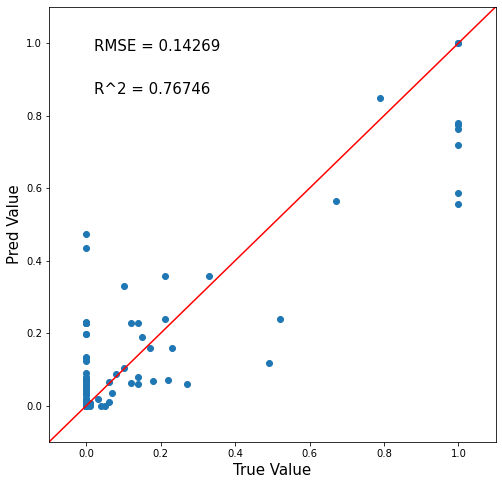

In [126]:
True_Pred_map(pred_df)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

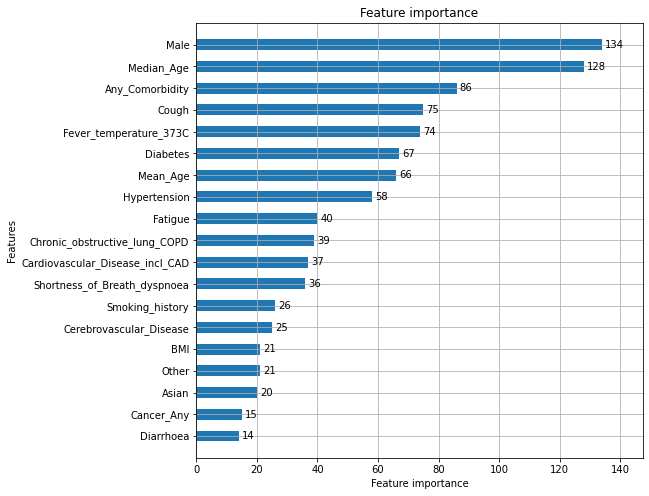

In [127]:
lgb.plot_importance(gbm, height=0.5, figsize=(8,8))